In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [3]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [4]:
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

print("Training Data")
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Training', i)
    print(f"Number of files in {i}: {len(os.listdir(folderPath))}")

Training Data
Number of files in glioma_tumor: 826
Number of files in meningioma_tumor: 822
Number of files in no_tumor: 395
Number of files in pituitary_tumor: 827


In [5]:
print("Testing Data")
for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Testing', i)
    print(f"Number of files in {i}: {len(os.listdir(folderPath))}")

Testing Data
Number of files in glioma_tumor: 100
Number of files in meningioma_tumor: 115
Number of files in no_tumor: 105
Number of files in pituitary_tumor: 74


In [6]:
# Training Data
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

for label in labels:
    # Load Training Data
    folderPath_train = os.path.join('../input/brain-tumor-classification-mri/Training', label)
    for filename in os.listdir(folderPath_train):
        img = cv2.imread(os.path.join(folderPath_train, filename))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(label)

    folderPath_test = os.path.join('../input/brain-tumor-classification-mri/Testing', label)
    for filename in os.listdir(folderPath_test):
        img = cv2.imread(os.path.join(folderPath_test, filename))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(label)

# Convert lists to numpy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)


In [7]:
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")

X_train shape: (3264, 150, 150, 3)
Y_train shape: (3264,)


In [8]:
print("X_train length:", len(X_train))
print("Y_train length:", len(Y_train))

X_train length: 3264
Y_train length: 3264


In [9]:
print("First two labels:", Y_train[:2])

First two labels: ['glioma_tumor' 'glioma_tumor']


In [10]:
print(X_train[1].shape)

(150, 150, 3)


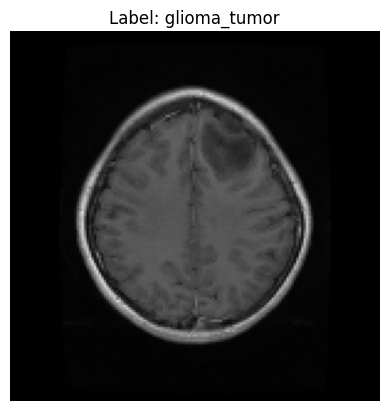

In [11]:
import matplotlib.pyplot as plt

# Access the second image
image = X_train[1]

# Display the image
plt.imshow(image)  # Use cmap='gray' for grayscale images
plt.title(f"Label: {Y_train[1]}")  # Display the corresponding label
plt.axis('off')  # Hide the axes for better visualization
plt.show()

In [12]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [13]:
print("X_train length:", len(X_train))
print("Y_train length:", len(Y_train))

X_train length: 3264
Y_train length: 3264


In [14]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Define the labels (should match the folder names)
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# Convert string labels to numerical using LabelEncoder
encoder = LabelEncoder()
encoder.fit(labels)

LabelEncoder()

In [15]:
# Transform Y_train to numerical
Y_train_encoded = encoder.transform(Y_train)

In [16]:
if any(isinstance(label, str) for label in Y_train_encoded):
    print("Y_train contains strings.")
else:
    print("Y_train does not contain strings.")


Y_train does not contain strings.


In [17]:
Y_train_encoded[1]

3

In [18]:
type(Y_train_encoded)

numpy.ndarray

In [19]:
Y_train_new = to_categorical(Y_train_encoded, num_classes=len(labels))

In [20]:
Y_train_new.shape

(3264, 4)

In [21]:
Y_train_new[1]

array([0., 0., 0., 1.])

In [22]:
len(Y_train_new)

3264

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train, Y_train_new, test_size=0.1, random_state=101
)


In [24]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))

model.add(Dropout(0.3))

model.add(Dense(4,activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [26]:
# Summary of the model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

**Training the Model:**

In [27]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20


I0000 00:00:1733645103.082295      70 service.cc:145] XLA service 0x7e258c015f80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733645103.082356      70 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 5/74 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.2369 - loss: 19.5078

I0000 00:00:1733645117.673787      70 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


74/74 ━━━━━━━━━━━━━━━━━━━━ 33s 217ms/step - accuracy: 0.2759 - loss: 4.9164 - val_accuracy: 0.2823 - val_loss: 1.3587
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.3799 - loss: 1.3011 - val_accuracy: 0.5187 - val_loss: 1.0368
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.5406 - loss: 1.0192 - val_accuracy: 0.6071 - val_loss: 0.9803
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.5945 - loss: 0.9131 - val_accuracy: 0.6003 - val_loss: 0.9195
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6363 - loss: 0.8518 - val_accuracy: 0.5850 - val_loss: 0.9694
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6952 - loss: 0.7237 - val_accuracy: 0.5884 - val_loss: 0.9224
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.7112 - loss: 0.6850 - val_accuracy: 0.6139 - val_loss: 0.8729
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.7344 - loss: 0.6005 - val_accuracy: 0.5731 - val_loss: 

In [28]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.7513 - loss: 0.6718
Test Accuracy: 77.06%


In [29]:
img = cv2.imread('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (100).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [30]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

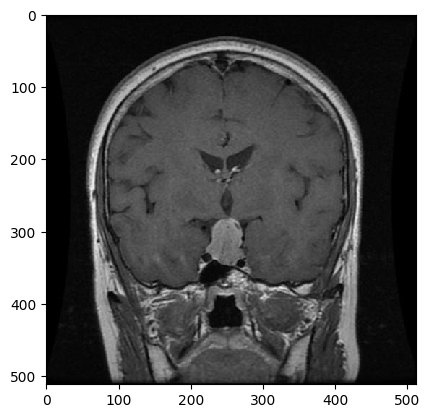

In [31]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (100).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [32]:
a = model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step


3

In [33]:
!pip install gradio


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 100.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: python-multipart
    Found existing installation: python-multipart 0.0.9
    Uninstalling python-multipart-0.0.9:
      Successfully uninstalled python-multipart-0.0.9
  Attempting uninstall: starlette
    Found existing installation: starlette 0.37.2
    Uninstalling starlette-0.37.2:
      Successfully uninstalled starlette-0.37.2
  Attempting uninstall: fastapi
    Found existing installation: fastapi 0.111.0
    Uninstalling fastapi-0.111.0:
      Successfully uninstalled fastapi-0.111.0


In [34]:
model.save('braintumor.h5')

In [35]:
import os

model_path = 'braintumor.h5'
if os.path.exists(model_path):
    print(f"Model file '{model_path}' found!")
else:
    print(f"Model file '{model_path}' does not exist.")


Model file 'braintumor.h5' found!


In [36]:
from tensorflow.keras.models import load_model

try:
    model = load_model('braintumor.h5')
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading model: {e}")


Model loaded successfully!


In [37]:
import gradio as gr
import cv2
import numpy as np
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model('braintumor.h5')  # Replace with your model's path
image_size = 150  # Size used during training

# Define labels
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# Preprocessing function
def preprocess_image(image):
    # Resize to match model input
    image = cv2.resize(image, (image_size, image_size))
    image = np.array(image) / 255.0  # Normalize the image
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Prediction function
def predict_tumor(image):
    # Convert the input to a NumPy array
    image = np.array(image)
    # Preprocess the image
    processed_image = preprocess_image(image)
    # Get predictions
    prediction = model.predict(processed_image)
    predicted_label = labels[np.argmax(prediction)]
    # Return the result
    return f"Predicted Tumor Type: {predicted_label}"

# Gradio interface
interface = gr.Interface(
    fn=predict_tumor,
    inputs=gr.Image(type="numpy"),  # Accepts an image as a NumPy array
    outputs="text",
    title="Brain Tumor Classification",
    description="Upload an MRI image to classify the type of tumor."
)

# Launch the app
interface.launch()


* Running on local URL:  http://127.0.0.1:7860
Kaggle notebooks require sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://7c8d88eef070977537.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
